## Setting up the Google Colab Notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(tf.__version__)

1.18.5
1.0.5
3.2.2
2.2.0


### Manipulating Data with pandas

In [ ]:
import datetime as dt

# 1. create a dataframe
df = pd.DataFrame()

# 2. Fill the first column with the first day of each month for 3 years 
dates = []
years = [2018,2019,2020]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

for y in years:
    for m in months:
        dates.append(dt.date(y,m,1))
dates =  pd.to_datetime(dates)

df['Date'] = dates

# 3. Fill the next 2 columns with random numbers.
n = len(dates)
df['X'] = np.random.uniform(size=n)
df['Y'] = np.random.uniform(size=n)

# 4. Fill the 4th column with the difference of the first 2 data columns (for example: Col3 - Col2).
df['Z'] = df.Y - df.X

# 5. Break the DataFrame into 3 different DataFrames based on the dates (for example: 2018, 2019, 2020)
yr_idx = pd.DatetimeIndex(df['Date']).year

gd = list(df.groupby(yr_idx))

df_2018 = gd[0][1]
df_2019 = gd[1][1]
df_2020 = gd[2][1]
print(df_2020)

         Date         X         Y         Z
24 2020-01-01  0.924418  0.160035 -0.764383
25 2020-02-01  0.673933  0.826578  0.152645
26 2020-03-01  0.994815  0.332702 -0.662113
27 2020-04-01  0.479505  0.546697  0.067192
28 2020-05-01  0.159137  0.830711  0.671573
29 2020-06-01  0.952283  0.969067  0.016784
30 2020-07-01  0.166070  0.327535  0.161465
31 2020-08-01  0.369285  0.088374 -0.280911
32 2020-09-01  0.934560  0.963489  0.028929
33 2020-10-01  0.081641  0.989303  0.907662
34 2020-11-01  0.453962  0.919077  0.465115
35 2020-12-01  0.887291  0.850486 -0.036805


### Create a Neural Network that can Convert Celsius to Fahrenheit

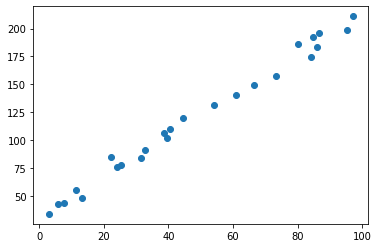

In [ ]:
# generate data
α = 9/5
β = 32.0
N = 25 # no. of data points
np.random.seed(43)
C = np.random.uniform(0, 100, N)
C = np.sort(C)
noise = np.random.normal(0, 5, N)

F = α * C + β + noise

plt.scatter(C, F)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=tf.nn.relu, input_shape=[1]),  # input layer
    tf.keras.layers.Dense(1)                                            # single output neuron
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

model.fit(C, F, epochs=5000, verbose=0)

## Analyse Results

In [ ]:
F_pred = model.predict(C)  # get predicted F given C values
results = pd.DataFrame(np.c_[C, F, F_pred], columns=['C','F','F_pred'])
print(results)

            C           F      F_pred
0    2.901382   34.237166   35.594398
1    5.688494   43.452900   43.231720
2    7.666270   44.259342   46.774303
3   11.505457   55.737150   53.651043
4   13.339096   48.534879   56.935444
5   22.102900   85.019321   72.633125
6   24.058962   76.017755   76.136826
7   25.442113   77.998743   78.614304
8   31.609647   84.098665   89.661575
9   32.713906   91.191091   91.639511
10  38.537691  106.570151  102.071045
11  39.495002  101.836137  103.785789
12  40.498945  110.400469  105.584030
13  44.575836  119.592773  112.886551
14  54.116221  132.056148  129.975250
15  60.906654  140.134589  142.138245
16  66.609021  149.740160  152.352295
17  73.374830  157.463817  164.471191
18  80.204712  186.339966  176.704849
19  84.322469  174.749936  184.080551
20  84.893915  192.704073  185.104111
21  85.913749  183.558064  186.930817
22  86.664864  196.282601  188.276245
23  95.448813  198.898884  204.026840
24  97.146509  210.996311  207.112366


## Plot results

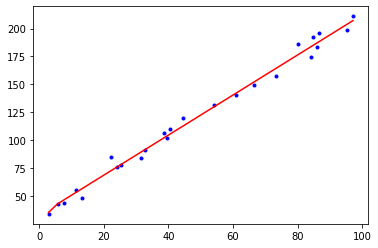

In [ ]:
plt.plot(C, F, 'b.', C, F_pred, 'r-')